# Определение перспективного тарифа для телеком-компании

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

Функция для обзора и отображания информации о данных

In [2]:
def table_info (df):
    display(df.sample(10)) #10 случайных строк
    print('---------------')
    df.info() #инфо по столбцам
    print('---------------')
    print('Дубликатов:', df.duplicated().sum()) #кол-во дубликатов
    print('---------------')
    print('Пропущенных значений', df.isna().sum()) #кол-во пропущенных значений

Функция для подсчета месячной выручки.

In [3]:
def calculate_revenue(row):
    minutes_revenue = 0
    gb_revenue = 0
    messages_revenue = 0
    
    if row['calls_overspending'] > 0:
        minutes_revenue = row['calls_overspending'] * row['rub_per_minute']
    if row['gb_overspending'] > 0:
        gb_revenue = row['gb_overspending'] * row['rub_per_gb']
    if row['messages_overspending'] > 0:
        minutes_revenue = row['messages_overspending'] * row['rub_per_message']

    
    return minutes_revenue + gb_revenue + minutes_revenue + row['rub_monthly_fee']

## Загрузка и обзор данных

Загрузка данных

In [4]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

### Информация о таблице 'calls'

In [5]:
table_info(calls)

,id,call_date,duration,user_id
30565,1077_137,2018-12-15,5.63,1077
187863,1464_383,2018-03-14,18.01,1464
40035,1099_408,2018-07-08,5.75,1099
73891,1185_685,2018-12-27,3.62,1185
127100,1325_481,2018-07-19,8.14,1325
52836,1133_101,2018-11-16,18.32,1133
2866,1007_69,2018-11-04,0.00,1007
23177,1059_261,2018-08-24,1.82,1059
95356,1243_3,2018-07-23,15.23,1243
103351,1265_13,2018-08-31,10.97,1265


---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
---------------
Дубликатов: 0
---------------
Пропущенных значений id           0
call_date    0
duration     0
user_id      0
dtype: int64


### Информация о таблице 'internet'

In [6]:
table_info(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
100269,100269,1337_306,0.00,2018-01-18,1337
49123,49123,1169_238,0.00,2018-11-30,1169
137226,137226,1460_161,0.00,2018-11-16,1460
69469,69469,1238_61,82.10,2018-10-14,1238
35827,35827,1124_207,0.00,2018-10-04,1124
64617,64617,1219_524,134.92,2018-07-06,1219
66401,66401,1226_158,438.92,2018-08-14,1226
35192,35192,1123_156,151.83,2018-11-04,1123
44725,44725,1154_283,0.00,2018-07-27,1154
75210,75210,1252_13,446.65,2018-12-07,1252


---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
---------------
Дубликатов: 0
---------------
Пропущенных значений Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


### Информация о таблице 'messages'

In [7]:
table_info(messages)

,id,message_date,user_id
43176,1186_589,2018-04-07,1186
115414,1471_642,2018-12-03,1471
113299,1459_55,2018-10-21,1459
42941,1186_354,2018-11-04,1186
90418,1375_218,2018-12-13,1375
86111,1356_1128,2018-12-10,1356
106937,1431_679,2018-08-02,1431
77300,1325_39,2018-11-10,1325
51102,1227_127,2018-12-11,1227
42133,1181_6,2018-12-30,1181


---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
---------------
Дубликатов: 0
---------------
Пропущенных значений id              0
message_date    0
user_id         0
dtype: int64


### Информация о таблице 'tariffs'

In [8]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Информация о таблице 'users'

In [9]:
table_info(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
392,1392,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra
308,1308,52,NaN,Москва,Инесса,Корнилова,2018-01-04,smart
202,1202,22,NaN,Владивосток,Адам,Адаменко,2018-09-20,smart
255,1255,40,2018-09-02,Саранск,Серафима,Пономарева,2018-02-19,ultra
281,1281,62,NaN,Нижний Новгород,Сара,Зимина,2018-06-09,ultra
184,1184,21,NaN,Барнаул,Снежана,Тарасова,2018-09-03,smart
116,1116,65,NaN,Петрозаводск,Альберта,Шевцова,2018-04-17,smart
144,1144,65,NaN,Улан-Удэ,Ефим,Ефремов,2018-04-29,smart
143,1143,64,NaN,Пермь,Арсен,Покровский,2018-04-27,ultra


---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
---------------
Дубликатов: 0
---------------
Пропущенных значений user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


### Вывод: 
- пропущенные значения только в таблице users столбец с данными об окончании использования тарифа; 
- необходимо изменить формат даты в таблицах;
- дубликатов в таблицах нет;
- в таблицах "calls" столбец "duration" и "internet" столбец "mb_used"  есть значени равные нулю. В первой таблице связано с пропущенными звонками, а во второй возможно с тем, что абонент не пользовался мобильным интернетом в данном месяце.

## Предобработка и подготовка 

Переведем даты в формат datetime.

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Добавим столбец с месяцем в который совершенно действие.

In [11]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [12]:
users['reg_date_test'] = users['reg_date'].astype('datetime64[M]')
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_test
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-06-01
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,2018-08-01
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01


В таблице с тарифами перевожу мб в гб.

In [13]:
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).astype('int')
tariffs = tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'})
display(tariffs)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


В таблице `tariffs` переименуем столбец `tariff_name` в `tariff`. В будующем по этому столбцу будем объединять.

In [14]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
display(tariffs)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


### Tаблица 'calls'

Компания округляет время потраченое на общение в большую сторону- округлим в таблице calls длительность звонков.

In [15]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
display(calls.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


В столбце "duration" есть значения равные 0, они обозначают входящие пропущенные звонки. При подсчете общего количества звонков дадут неверное значение.

In [16]:
zero_count = 0
for i in calls['duration']:
    if i == 0:
        zero_count += 1
print(zero_count)

39613


Выделю в отдельную таблицу строки с длительностью звонка больше 0 и по этим данным построю сводную таблицу с количеством и продолжительностью звонков в месяц по каждому пользователю

In [17]:
calls_pivot = calls.query('duration > 0')
calls_pivot = calls_pivot.pivot_table(index=['user_id','month'], values='duration', aggfunc=['sum', 'count']).reset_index()
display(calls_pivot.head())

,user_id,month,sum,count
,,,duration,duration
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46


Изменим название столбцов.

In [18]:
calls_pivot.columns = ['user_id', 'month','minutes_used','count_calls']
display(calls_pivot.head())

,user_id,month,minutes_used,count_calls
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46


### Tаблица 'messages'

Сводная таблица по отправленным сообщениям по месяцам.

In [19]:
messages_pivot = messages.pivot_table(index=['user_id','month'], values='id', aggfunc=['count']).reset_index()
display(messages_pivot.head())

,user_id,month,count
,,,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Изменим названия столбцов.

In [20]:
messages_pivot.columns = ['user_id', 'month','messages_used']
display(messages_pivot.head())

,user_id,month,messages_used
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Таблица 'internet'

Изменим названия столбцов.

In [21]:
internet = internet.rename(columns={'mb_used':'gb_used'})
display(internet.head())

,Unnamed: 0,id,gb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


Сводная таблица по израсходованному интернет-трафику за месяц.

In [22]:
internet_pivot = internet.pivot_table(index=['user_id','month'], values='gb_used', aggfunc='sum').reset_index()
display(internet_pivot.head())

,user_id,month,gb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Оператор округляет мегобайты до гб в большую сторону- переведем значения internet['mb_used'] в гб.

In [23]:
internet_pivot['gb_used'] = np.ceil(internet_pivot['gb_used'] / 1024)
display(internet_pivot.head())

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0


### Общая таблица

In [24]:
data_frames = [calls_pivot, internet_pivot, messages_pivot]
general_table = reduce(lambda left,right: pd.merge(left,right,on=['user_id','month'], how='outer'), data_frames)
general_table = general_table.merge(users, on='user_id',how='left')
general_table = general_table.merge(tariffs, on='tariff',how='left')
general_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   minutes_used           3168 non-null   float64       
 3   count_calls            3168 non-null   float64       
 4   gb_used                3203 non-null   float64       
 5   messages_used          2717 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    object        
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  reg

Подсчет перерасхода.

In [25]:
general_table['calls_overspending'] = general_table['minutes_used'] - general_table['minutes_included']
general_table['gb_overspending'] = general_table['gb_used'] - general_table['gb_per_month_included']
general_table['messages_overspending'] = general_table['messages_used'] - general_table['messages_included']
display(general_table.head())

,user_id,month,minutes_used,count_calls,gb_used,messages_used,age,churn_date,city,first_name,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_overspending,gb_overspending,messages_overspending
0,1000,5,159.0,17.0,3.0,22.0,52,NaN,Краснодар,Рафаил,...,1000,30,3000,1950,150,1,1,-2841.0,-27.0,-978.0
1,1000,6,172.0,28.0,23.0,60.0,52,NaN,Краснодар,Рафаил,...,1000,30,3000,1950,150,1,1,-2828.0,-7.0,-940.0
2,1000,7,340.0,41.0,14.0,75.0,52,NaN,Краснодар,Рафаил,...,1000,30,3000,1950,150,1,1,-2660.0,-16.0,-925.0
3,1000,8,408.0,42.0,14.0,81.0,52,NaN,Краснодар,Рафаил,...,1000,30,3000,1950,150,1,1,-2592.0,-16.0,-919.0
4,1000,9,466.0,46.0,15.0,57.0,52,NaN,Краснодар,Рафаил,...,1000,30,3000,1950,150,1,1,-2534.0,-15.0,-943.0


Применим фукнцию и подсчитаем выручку по каждому пользователю.

In [26]:
general_table['revenue'] = general_table.apply(calculate_revenue, axis = 1)
display(general_table.head())

,user_id,month,minutes_used,count_calls,gb_used,messages_used,age,churn_date,city,first_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_overspending,gb_overspending,messages_overspending,revenue
0,1000,5,159.0,17.0,3.0,22.0,52,NaN,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2841.0,-27.0,-978.0,1950.0
1,1000,6,172.0,28.0,23.0,60.0,52,NaN,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2828.0,-7.0,-940.0,1950.0
2,1000,7,340.0,41.0,14.0,75.0,52,NaN,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2660.0,-16.0,-925.0,1950.0
3,1000,8,408.0,42.0,14.0,81.0,52,NaN,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2592.0,-16.0,-919.0,1950.0
4,1000,9,466.0,46.0,15.0,57.0,52,NaN,Краснодар,Рафаил,...,30,3000,1950,150,1,1,-2534.0,-15.0,-943.0,1950.0


### Вывод:
были построены сводные таблицы по пользователям и месяцам. Посчитан перерасход услуг из пакета и доход от каждого пользователя по месяцам. Все данные объединены в одну таблицу.

## Анализ

### Тариф "Смарт"

Посчитаем количество использованных минут по месяцам. В декабре наблюдается самый большой расход минут, может быть с приближением новогодних празников и суетой связанной с этим событием. Наименьшее значение использованных минту в январе, думаю, это обусловленно январьскими выходными. В этот период большинство не совершает рабочих звонков, некоторые уезжают за границу и соответсвенно не пользуются домашними симкартами.

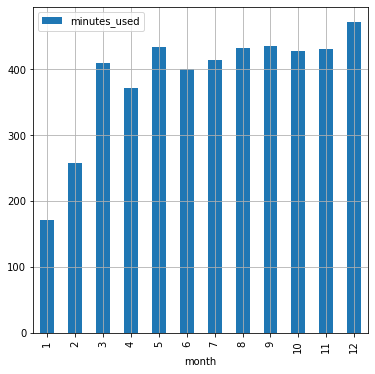

In [27]:
(
    general_table.query('"smart" in tariff')
    .pivot_table(index='month', values='minutes_used', aggfunc='median')
    .reset_index()
    .plot(x='month', y='minutes_used', kind='bar',figsize=(6, 6), grid=True)
    );

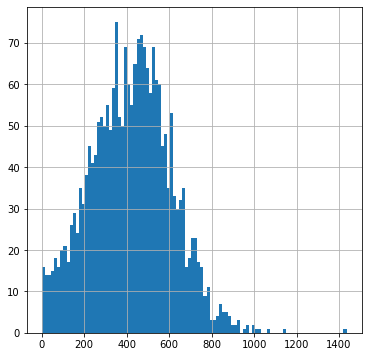

In [28]:
general_table.query('"smart" in tariff')['minutes_used'].hist(bins=100,figsize=(6, 6), grid=True);

Большинство данных расположены в промежутке от 0 до 800. Есть скопление около 0, скорее всего связано с пропущенными входящими звонками. 

Рассмотрим количество использованных сообщений по месяцам. Ситуация схажа с использованием минут: максимальные пики приходятся на декабрь и май. В мае многие поздравляют друг друга с праздником победы, возможно с данным событием связан пик в этот период. Минимальное значение приходится на январь.

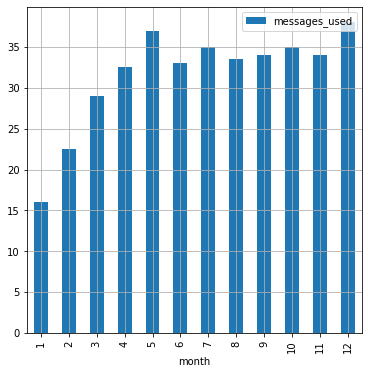

In [29]:
(
    general_table.query('"smart" in tariff')
    .pivot_table(index='month', values='messages_used', aggfunc='median')
    .reset_index()
    .plot(x='month', y='messages_used', kind='bar',figsize=(6, 6), grid=True)
    );

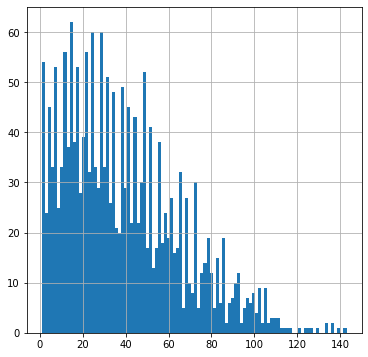

In [30]:
general_table.query('"smart" in tariff')['messages_used'].hist(bins=100,figsize=(6, 6), grid=True);


В промежутке от 0 до 120 находится основная часть даннных.

Изучим количество использованных гб трафика по месяцам. Ситуация очень схожа с использованием минут звонком и смс-сообщений. в декабре максимум, в январе минимум.

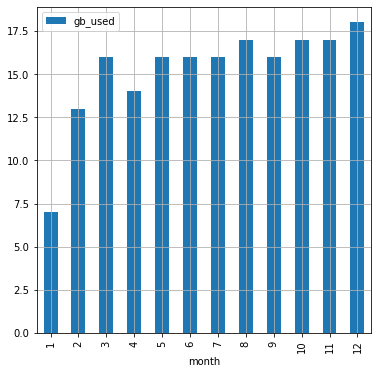

In [31]:
(
    general_table.query('"smart" in tariff')
    .pivot_table(index='month', values='gb_used', aggfunc='median')
    .reset_index()
    .plot(x='month', y='gb_used', kind='bar',figsize=(6, 6), grid=True)
    );

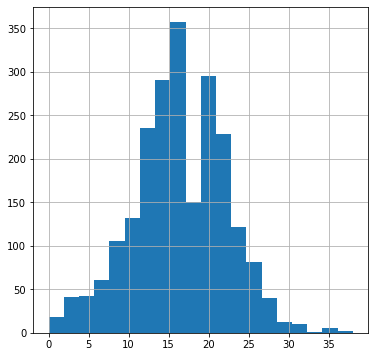

In [32]:
general_table.query('"smart" in tariff')['gb_used'].hist(bins=20,figsize=(6, 6), grid=True);

<div class="alert alert-info"> Нормальное распределение. Основная масса данных лежит в промежутке от 0 до 30. На 16-17 провал. 

Дисперсия, стандартное отклонение и среднее по использованному трафику

In [33]:
sr = general_table.query('"smart" in tariff')['revenue']
print(np.var(sr, ddof=1))
print(np.std(sr, ddof=1))
print(sr.mean())

803249.5351434891
896.2418954408955
1344.6882009869896


### Тариф "Ультра"

При рассмотрении графика использованных минут по месяцам  можем заметить, что в декабре и июле абоненты тратили минуты активнее всего, а в феврале было потрачено меньше всего минут. Данные распределены в диапозоне от 0 до 1300. 

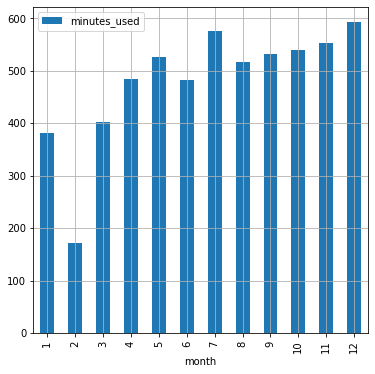

In [34]:
(
    general_table.query('"ultra" in tariff')
    .pivot_table(index='month', values='minutes_used', aggfunc='median')
    .reset_index()
    .plot(x='month', y='minutes_used', kind='bar',figsize=(6, 6), grid=True)
    );

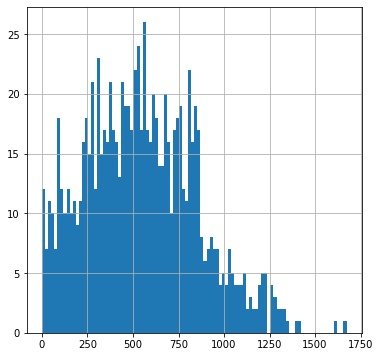

In [35]:
general_table.query('"ultra" in tariff')['minutes_used'].hist(bins=100,figsize=(6, 6), grid=True);

В декабре и октябре было отправленно больше всего сообщений, в марте наименьшее количество. В диапозоне от 0 до 175 находится основная масса данных. 

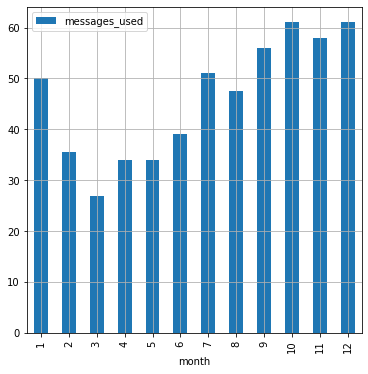

In [36]:
(
    general_table.query('"ultra" in tariff')
    .pivot_table(index='month', values='messages_used', aggfunc='median')
    .reset_index()
    .plot(x='month', y='messages_used', kind='bar',figsize=(6, 6), grid=True)
    );

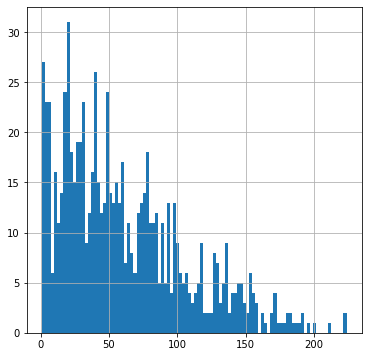

In [37]:
general_table.query('"ultra" in tariff')['messages_used'].hist(bins=100,figsize=(6, 6), grid=True);

Максимальное количество гб трафика использованно в декабре, минимальное в феврале. Большое количество данных находятся в промежутке от 0 до 45.

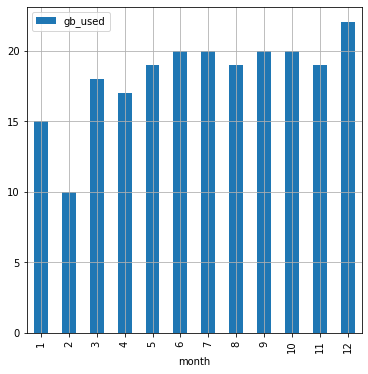

In [38]:
(
    general_table.query('"ultra" in tariff')
    .pivot_table(index='month', values='gb_used', aggfunc='median')
    .reset_index()
    .plot(x='month', y='gb_used', kind='bar',figsize=(6, 6), grid=True)
    );

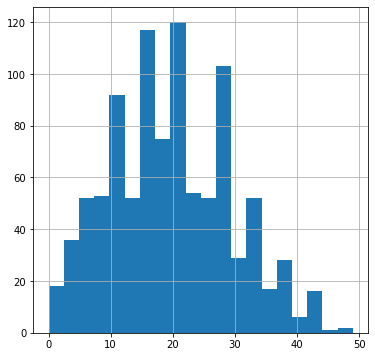

In [39]:
general_table.query('"ultra" in tariff')['gb_used'].hist(bins=20,figsize=(6, 6), grid=True);

Дисперсия, стандартное отклонение и среднее по использованному трафику

In [40]:
ur = general_table.query('"ultra" in tariff')['revenue']
print(np.var(ur, ddof=1))
print(np.std(ur, ddof=1))
print(ur.mean())

141516.74507861698
376.1871144505311
2070.1522842639592


### Выручка

Дополнительная выручка по тарифам: смарт - 1771360, ультра - 118350.  

In [41]:
general_table['add_revenue'] = general_table['revenue'] - general_table['rub_monthly_fee']
print(general_table.query('"smart" in tariff')['add_revenue'].sum())
print(general_table.query('"ultra" in tariff')['add_revenue'].sum())

1771360.0
118350.0


Общая выручка от тарифов: смарт - 2997310, ультра - 2039100.

In [42]:
print(general_table.query('"smart" in tariff')['revenue'].sum())
print(general_table.query('"ultra" in tariff')['revenue'].sum())

2997310.0
2039100.0


### Вывод
Тариф "Смарт":
- в основном абоненты тратят от 390 - 440 минут звонков входящих в тариф. Минимальное значение 170, максимальное 470 минут;
- из пакета в 50 сообщений расходуется не более 40 сообщений в месяц. Чаще всего отправляют от 31 до 39 сообщений.
- большинство расходуют интернет-трафика в диапозоне от 16 до 18 Гб в месяц.

Тариф "Ультра":
- пользователи чаще всего выговаривают от 450 до 590 минут из тарифа;
- расход смс-сообщений распологается в диапозоне 47 до 61 собщений в месяц;
- использование Гб интернета у абонентов -  от 15 до 22 Гб в месяц. 

Если сравнивать траты абонентов двух тарифов, то можно отметить, что пользоаватели "Ультра" расходуют больше минут и сообщений, а гб интернета меньше. Пользоватили двух тарифов чаще всего расходуют больше интернет-трафика, чем включено в их пакет. Для тех, кто использует тариф "Смарт" 1гб интернета стоит дороже, чем в тарифе "Ультра" и перерасход услуги у таких пользователей выше. Хоть и стоимость абонентской платы тарифа ниже, такие абоненты могут приносить больше выгоды, чем пользователи более дорогого "Ультра". 

## Проверка гипотезы

### Сравнение средней выручки по тарифам
Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая. 

Альтернативная гипотеза: средняя выручка абонентов тарифа «Смарт» не равна средней выручки абонентов тарифа «Ультра».

In [43]:
results = st.ttest_ind(
general_table.query('"smart" in tariff')['revenue'],
general_table.query('"ultra" in tariff')['revenue'],
equal_var = False)
alpha = .05

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

Отвергаем нулевую гипотезу


Вторая альтернативная гипотеза: средняя выручка абонентов тарифа «Смарт» больше средней выручки абонентов тарифа «Ультра».

In [44]:
#дисперсия, стандартное отклонение и средние у выборки по тарифу "Ультра" больше чем у выборки по тарифу "Смарт".
results = st.ttest_ind(
general_table.query('"smart" in tariff')['revenue'],
general_table.query('"ultra" in tariff')['revenue'],
equal_var = False)
alpha = .05

if (
    (results.pvalue / 2 < alpha) & 
(general_table.query('"smart" in tariff')['revenue'].mean() > general_table.query('"ultra" in tariff')['revenue'].mean())
):
    print("Отвергаем гипотезу")
else:
    print("Не отвергаем гипотезу") 

Не отвергаем гипотезу


### Сравнение средней выручки по географии
Нулевая гипотеза: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [45]:
results = st.ttest_ind(
general_table.query('"Москва" in city')['revenue'],
general_table.query('"Москва" not in city')['revenue'],
equal_var = False)
alpha = .05

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

Не отвергаем нулевую гипотезу


Нулевая гипотеза не опровергнута, нет смысла проводит односторонний тест.

### Вывод
Первый тест показал, что средняя выручка по тарифу "Смарт" выше, чем по тарифу "Ультра".
Второй тест показал, что средняя выручка по Москве примерно равна средней выручке по другим регионам.

## Вывод

Анализ показал, что для абонентов обоих тарифов самой популярной услугой является мобильный интернет, а самой не популярной - смс-сообщения. Перерасходуют услуги только абоненты тарифа "Смарт". Единственное, что используется сверх - пакета Гб интернета.  

Пользователи тарифа "Смарт" в месяц используют услуги в следующих объемах:
- максимум 31 - 39 смс-сообщения;
- 390 - 440 минуты звонков;
- 16 - 18 Гб интернета.

Абоненты тарифа "Ультра" расходуют в месяц:
- 47 - 51 смс-сообщение;
- 450 - 590 минут;
- 15 - 22 Гб интернета.


На основании графиков и статистического теста можно заключить, что тарифа "Смарт" приносит компании больше денег, не смотря на более низкую стоимость абонентской платы. Происходит это из-за большого перерасхода пакета интернет трафика пользователями и стоимости за 1 гб выше, чем в тарифе "Ультра". "Смарт" приносить больше дополнительной общей выручки.

Размер выручки не зависит от георграфии. Средняя выручка по регионам примерно такая же как и по Москве.